<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Lasso-регрессия" data-toc-modified-id="Lasso-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lasso-регрессия</a></span></li><li><span><a href="#Ridge-регрессия" data-toc-modified-id="Ridge-регрессия-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Ridge-регрессия</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузим библиотеки

In [1]:
# Установка altair
%pip install altair vega_datasets

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np


import seaborn as sns
import altair as alt # https://altair-viz.github.io/index.html
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

from sklearn.utils import shuffle
from sklearn.metrics import r2_score

In [6]:
random_value = 2021

Прочитаем данные

In [8]:
data = pd.read_csv('datasets/insurance.csv')

In [9]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [11]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Напишем функцию для отображения уникальных значений столбца и общее количество значений по каждому уникальному значению.

In [12]:
def alt_value_counts(df, col, title):
    
    series_age_info = df.groupby(col)[col].count()
    data_age_info = pd.DataFrame({col:series_age_info.index, 'Количество':series_age_info.values})
    
    bars = alt.Chart(data_age_info, title = title).mark_bar().encode(
        x='Количество:Q',
        y=col + ":O"
    )

    text = bars.mark_text(
        align='left',
        baseline='middle',
        dx=3  # Nudges text to right so it doesn't appear on top of the bar
    ).encode(
        text='Количество:Q'
    )

    return (bars + text).properties(height = len(series_age_info) * 20)

И функцию для отображения распределения

In [13]:
def sns_hist(series, title, ox_label):
    plt.figure(figsize=(10,5))
    sns.distplot(series)
    plt.axvline(series.median())
    plt.xlabel(ox_label, fontsize=16)
    plt.ylabel('Плотность', fontsize=16)
    plt.title(title, fontsize=20)
    rcParams['axes.titlepad'] = 0

Изучим данные:

In [14]:
alt_value_counts(data, 'Пол', 'Пол')

alt.LayerChart(...)

In [15]:
alt_value_counts(data, 'Возраст', 'Возраст')

alt.LayerChart(...)

C:\Users\Brkv\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


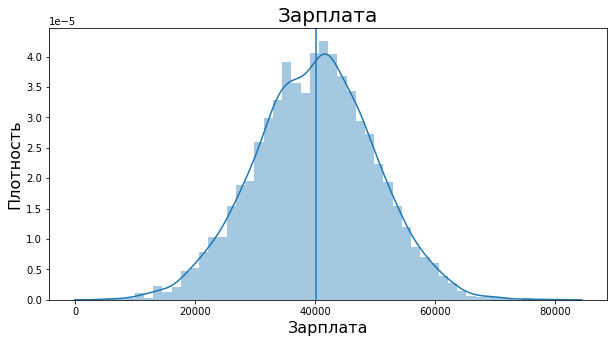

In [16]:
sns_hist(data['Зарплата'], 'Зарплата', 'Зарплата')

In [17]:
alt_value_counts(data, 'Члены семьи', 'Члены семьи')

alt.LayerChart(...)

In [18]:
alt_value_counts(data, 'Страховые выплаты', 'Страховые выплаты')

alt.LayerChart(...)

С данными всё в порядке. Но столбцы Возраст и Зарплата мы имеем право привести к типу int.

In [19]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

Посмотрим на матрицу корреляции.

<AxesSubplot:>

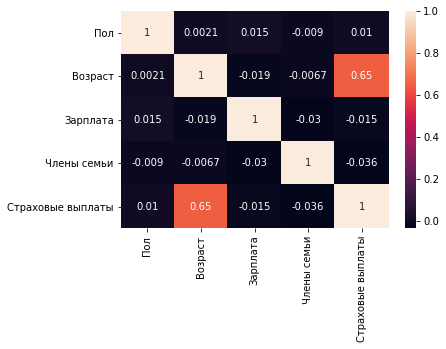

In [20]:
sns.heatmap(data.corr(), annot=True)

Всё в норме. Отклонений нет.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** 

Пусть наша первоначальная матрица признаков - X, а обратимая матрица, на которую мы будем домножать - P.
Тогда, предсказания для первоначальной матрицы можно выразить как 
$$
a = Xw - (!)
$$
где
$$
w = (X^T X)^{-1} X^T y       
$$
Или
$$
a = X(X^T X)^{-1} X^T y      - (0)
$$

А аналогичные предсказания для признаков X' домноженных на матрицу P **X' = XP** можно выразить так:
$$
a' = X'w' = XPw' 
$$
, где 
$$
w' = (X'^T X')^{-1} X'^T y   
$$
Получаем:
$$
a' = XP((XP)^T XP )^{-1} (XP)^T y - (1)
$$
Используем правило
$$
(AB)^T = B^T A^T 
$$

Получаем из **(1)**:
$$
a' = XP((P^T X^T) (XP))^{-1} (P^T X^T) y - (2)
$$

Обратная матрица от произведения матриц равна:
$$
(AB)^{-1} = B^{-1} A^{-1} 
$$

Используя это правило преобразуем **(2)**:
$$
a' = XP (XP)^{-1} (P^T X^T)^{-1} (P^T X^T) y - (2.1)
$$

И раскроем скобки ещё раз:
$$
a' = XP P^{-1} X^{-1} X^{T-1} P^{T-1} P^T X^T y - (3)
$$

В выражении **(3)** видим любопытную деталь - выделим её в скобки:
$$
a' = X(P P^{-1}) X^{-1} X^{T-1} (P^{T-1} P^T) X^T y - (3.1)
$$

Т.к. одно из свойств привзедения нескольких матриц имеет следующий вид:
$$
ABC = A(BC) = (AB)C
$$
А также:
$$
AA^{-1} = A^{-1}A = E
$$

Преобразуем **(3.1)** в выражение следующего вида:

$$
a' = XE X^{-1} X^{T-1} E X^T y - (3.2)
$$

В свою очередь:
$$
AE = EA = A
$$
Поэтому:
$$
a' = X X^{-1} X^{T-1} X^T y - (3.3)
$$

Возвращая первую часть обратно под скобки - получаем:

$$
a' = X (X^T X)^{-1} X^T y - (4)
$$

В свою очередь правая часть (начиная со второго множителя равна w), откуда:
$$
a' = Xw - (5)
$$

Возвращаясь к метке **(!)** приходим к выводу:
$$
a' = a
$$

Ч.т.д.

### Вывод
Домножение матрицы признаков на обратимую матрицу не изменит предсказания модели.

## Алгоритм преобразования

**Алгоритм**

Исходя из выводов полученных в предыдущем пункте можно предложить следующий алгоритм преобразования - домножение на обратимую матрицу (ключевая матрица) порядка [n x n], где n - количество признаков. В нашем случае ключевая матрица будет порядка [4 х 4].

**Обоснование**

Перемножение матриц - достаточно непредсказуемая (в плане результата операция), поэтому восстановить, не зная ключевой матрицы, исходные данные - крайне проблематичная задача.

В свою очередь, зная ключевое матрицу, расшифровать можно простым домножением уже преобразованных признаков на матрицу обратную ключевой.

## Проверка алгоритма

Напишем функцию для определения обучающей, валидационной, кроссвалидационной и тестовой выборок из первоначального датасета

In [21]:
def split_data(data):
    # Получим обучающую и тестовую выборки 
    data_train, data_test = train_test_split(data, test_size=0.25, random_state=random_value, shuffle = True)

    return data_train, data_test

In [22]:
data_train, data_test = split_data(data)

Определим функции которые будут выделять отдельно признаки и отдельно целевой признак.

In [23]:
def get_target(data, field):
    return data[field]

In [24]:
def get_features(data, field):
    return data.drop([field], axis = 1)

И функцию, возвращающую отдельно признаки и целевой признак.

In [25]:
def ftr_trgt_split(data, target_field):
    features_train = get_features(data, target_field)
    target_train = get_target(data, target_field)
    return features_train, target_train

In [26]:
features_train, target_train = ftr_trgt_split(data_train, 'Страховые выплаты')

In [27]:
features_test, target_test = ftr_trgt_split(data_test, 'Страховые выплаты')

Определим ключевую матрицу. Она должна быть обратимой.

In [28]:
def generate_key_matrix(n, extr_value):
    #Функция генерирующая случайную обратимую матрицу размерности [n x n] 
        #с распределением случайных чисел от -extr_value до extr_value
    #n - размерность матрицы
    #extr_value - число определяющее нижнюю (со знаком "-") и верхнюю границы распределения случайных чисел матрицы
    try:
        key_matrix = np.random.randint(-extr_value, extr_value, size=(n, n))
        if(np.linalg.det(key_matrix) == 0):
            key_matrix = generate_key_matrix(n)
            return key_matrix
        return key_matrix
    except:
        print('Ошибка вычисления')

In [29]:
key_matrix = generate_key_matrix(4, 100)

In [30]:
print('Определитель ключевой матрицы равен: ', np.linalg.det(key_matrix))

Определитель ключевой матрицы равен:  -122066895.99999972


Определитель ключевой матрицы не равен нулю.

Зашифруем признаки обучающей и тестовой выборки в отдельные переменные. 

In [31]:
features_train_modified = np.array(features_train) @ key_matrix
features_test_modified = np.array(features_test) @ key_matrix

Посмотрим на корреляцию признаков в зашифрованных данных

<AxesSubplot:>

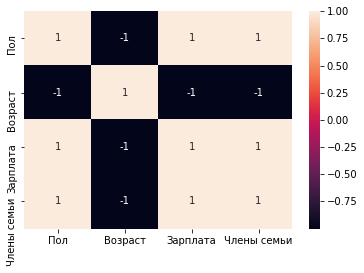

In [32]:
sns.heatmap(pd.DataFrame(data=features_train_modified, columns = features_train.columns).corr(), annot=True)

Удивительно, но все они коррелируют друг с другом..
Убедимся в этом построив график зависимости возраста и зарплаты, например, до и после шифрования.

In [33]:
def dependance_2cols(field_x, label_x, field_y, label_y, data, title):
    plt.figure(figsize=(4,4))
    sns.jointplot(
        x=field_x, 
        y=field_y, 
        data=data, 
        kind="reg", 
        #truncate=False, 
        height=7
    )
    plt.xlabel(label_x, fontsize=16)
    plt.ylabel(label_y, fontsize=16)
  #  plt.title(title, fontsize=20)
  #  rcParams['axes.titlepad'] = 100 

In [34]:
rcParams['axes.titlepad']

0.0

<Figure size 288x288 with 0 Axes>

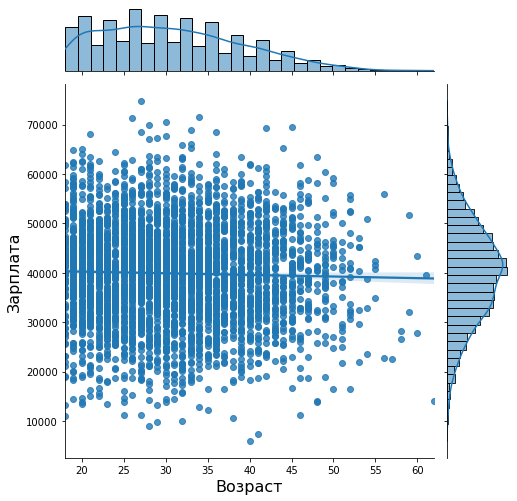

In [35]:
dependance_2cols('Возраст', 
                 'Возраст', 
                 'Зарплата', 
                 'Зарплата', 
                 data_train, 
                 'Зависимость возраста и зарплаты. До шифрования.')

<Figure size 288x288 with 0 Axes>

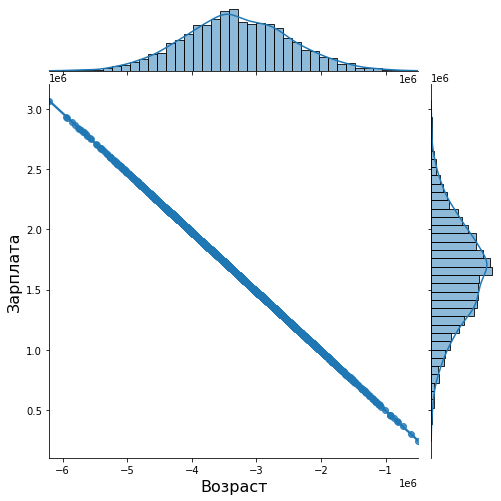

In [36]:
dependance_2cols('Возраст', 
                 'Возраст', 
                 'Зарплата', 
                 'Зарплата', 
                 pd.DataFrame(data=features_train_modified, columns = features_train.columns), 
                 'Зависимость возраста и зарплаты. После шифрования.')

Да, действительно, зависимость стала строго линейной.
Это, видимо, происходит из-за того, что одни и те же признаки разных наблюдений после умножения на обратимую матрицу будут описываться одним и тем же уравнением.

Также можно предположить, что эффективность lasso-регрессии на этих данных будет отличаться за счёт зануления весов коррелирующих признаков. 


Напишем функции обучения моделей.

In [37]:
def linear_regressio(features, target):
    model = LinearRegression(fit_intercept = True, normalize = True, copy_X = True)
    model.fit(features, target)
    
    return model

In [38]:
def lasso_regressio(features, target):
    model = linear_model.Lasso(alpha=0.01)
    model.fit(features, target)
    
    return model

In [105]:
def ridge_regressio(features, target, alpha=0.1):
    model = Ridge(alpha=alpha, solver = 'cholesky')
    model.fit(features, target)
    
    return model

Функция предсказания ответов и подсчета R2.

In [40]:
def do_predict_and_r2(model, features):
    y = model.predict(features)
    return r2_score(target_test, y)

Функция вывода коэффициентов

In [41]:
def get_coeffs(model):
    return model.coef_

### Масштабирование признаков

Приведем все признаки к одному масштабу

In [42]:
def super_scaler(data_train, data_test):
    #numeric = data_train.columns

    scaler = StandardScaler()
    scaler.fit(data_train)
    data_train = scaler.transform(data_train)
    data_test = scaler.transform(data_test)
    return data_train, data_test

In [43]:
features_train_sc, features_test_sc = super_scaler(
    features_train, 
    features_test
)

In [44]:
features_train_modified_sc, features_test_modified_sc = super_scaler(
    features_train_modified, 
    features_test_modified
)

### Линейная регрессия

In [55]:
%%time
lin_model_1 = linear_regressio(features_train_sc, target_train)
lin_model_2 = linear_regressio(features_train_modified_sc, target_train)

Wall time: 17 ms


In [57]:
print('R2 модели линейной регрессии на обычных данных: ', do_predict_and_r2(lin_model_1, features_test_sc))
print('R2 модели линейной регрессии на зашифрованных данных: ', do_predict_and_r2(lin_model_2, features_test_modified_sc))

R2 модели линейной регрессии на обычных данных:  0.4163585126426165
R2 модели линейной регрессии на зашифрованных данных:  0.416358512642685


In [58]:
print('Коэффициенты модели линейной регрессии на обычных данных: ', get_coeffs(lin_model_1))
print('Коэффициенты модели линейной регрессии на зашифрованных данных: ', get_coeffs(lin_model_2))

Коэффициенты модели линейной регрессии на обычных данных:  [-7.63994824e-05  2.93837416e-01 -3.15851817e-03 -1.77947008e-02]
Коэффициенты модели линейной регрессии на зашифрованных данных:  [-349.97826014 -310.76972794  187.19410218 -147.99657903]


Вот мы и убедились в том, что эффективность модели линейной регрессии после домножения на обратимую матрицу не меняется.

При этом коэффициенты изменились.

### Lasso-регрессия

In [49]:
%%time
lasso_1 = lasso_regressio(features_train_sc, target_train)
lasso_2 = lasso_regressio(features_train_modified_sc, target_train)

Wall time: 39 ms


In [50]:
print('R2 модели lasso-регрессии на обычных данных: ', do_predict_and_r2(lasso_1, features_test_sc))
print('R2 модели lasso-регрессии на зашифрованных данных: ', do_predict_and_r2(lasso_2, features_test_modified_sc))

R2 модели lasso-регрессии на обычных данных:  0.4149383735646045
R2 модели lasso-регрессии на зашифрованных данных:  -0.0003400591262927577


In [51]:
print('Коэффициенты модели lasso-регрессии на обычных данных: ', get_coeffs(lasso_1))
print('Коэффициенты модели lasso-регрессии на зашифрованных данных: ', get_coeffs(lasso_2))

Коэффициенты модели lasso-регрессии на обычных данных:  [ 0.          0.28408974 -0.         -0.00786306]
Коэффициенты модели lasso-регрессии на зашифрованных данных:  [-0.          0.         -0.         -0.00120676]


Да, действительно почти все признаки во втором случае равны нулю. И модель почти равносильна выводу матожидания, R2 тоже это показывает - он около 0.

In [ ]:
coeffs = np.linalg.inv(key_matrix) @ get_coeffs(lin_model_1).T
print(
    'Рассчитанные весовые коэффициенты модели линейной регрессии на зашифрованных данных', 
    coeffs
)

### Ridge-регрессия

In [52]:
ridge_1 = ridge_regressio(features_train_sc, target_train)
ridge_2 = ridge_regressio(features_train_modified_sc, target_train)

In [53]:
print('R2 модели ridge-регрессии на обычных данных: ', do_predict_and_r2(ridge_1, features_test_sc))
print('R2 модели ridge-регрессии на зашифрованных данных: ', do_predict_and_r2(ridge_2, features_test_modified_sc))

R2 модели ridge-регрессии на обычных данных:  0.41635723005659986
R2 модели ridge-регрессии на зашифрованных данных:  0.017318150577318447


In [54]:
print('Коэффициенты модели ridge-регрессии на обычных данных: ', get_coeffs(ridge_1))
print('Коэффициенты модели ridge-регрессии на зашифрованных данных: ', get_coeffs(ridge_2))

Коэффициенты модели ridge-регрессии на обычных данных:  [-7.62278806e-05  2.93829579e-01 -3.15864328e-03 -1.77943581e-02]
Коэффициенты модели ridge-регрессии на зашифрованных данных:  [-0.55982942 -5.46502816  1.65262145 -6.56884784]


И снова во втором случае, за счёт регуляризации зашифрованный датасет предсказывается гораздо хуже.

P.S. А без масштабирования признаков предсказания были одинаковы. Почему так происходит?

## Расчёт коэффициентов

### Линейная регрессия

In [60]:
print('Коэффициенты модели линейной регрессии на обычных данных: ', get_coeffs(lin_model_1))

Коэффициенты модели линейной регрессии на обычных данных:  [-7.63994824e-05  2.93837416e-01 -3.15851817e-03 -1.77947008e-02]


In [59]:
np.linalg.inv(features_train_sc.T @ features_train_sc) @ features_train_sc.T @ target_train

array([-7.63994824e-05,  2.93837416e-01, -3.15851817e-03, -1.77947008e-02])

### Lasso-регрессия

In [122]:
print('Коэффициенты модели линейной регрессии на обычных данных: ', get_coeffs(lasso_1))

Коэффициенты модели линейной регрессии на обычных данных:  [ 0.          0.28408974 -0.         -0.00786306]


In [123]:
np.linalg.inv(features_train_sc.T @ features_train_sc) @ (features_train_sc.T @ target_train - 0.5 * lambda_L1 @ np.eye(4))

array([-0.13160576,  0.15696531, -0.14322167, -0.15977433])

In [69]:
features_train_sc.T @ target_train 

array([  23.58348008, 1103.32972893,  -40.49857093,  -84.8060093 ])

### Ridge-регрессия

In [124]:

l = 10
lambda_L1 = np.array([l, l, l, l])
lambda_L1

array([10, 10, 10, 10])

In [125]:
ridge_1 = ridge_regressio(features_train_sc, target_train, alpha=l)

In [126]:
print('Коэффициенты модели ridge-регрессии на обычных данных: ', get_coeffs(ridge_1))

Коэффициенты модели ridge-регрессии на обычных данных:  [-5.93290243e-05  2.93055806e-01 -3.17093909e-03 -1.77604930e-02]


In [127]:
np.linalg.inv(features_train_sc.T @ features_train_sc + l * np.eye(4) ) @ features_train_sc.T @ target_train

array([-5.93290243e-05,  2.93055806e-01, -3.17093909e-03, -1.77604930e-02])

## Вывод

На **первом этапе** были загружены и изучены данные.  
Принято решение столбцы Возраст и Зарплата привести к типу int.

На **втором этапе** было доказано, что домножение матрицы признаков на обратимую матрицу не изменит предсказания модели.

На **третьем этапе**, исходя из выводов полученных в предыдущем пункте, предложен следующий алгоритм преобразования - домножение на обратимую матрицу (ключевая матрица) порядка [n x n], где n - количество признаков. В нашем случае ключевая матрица будет порядка [4 х 4].  
Обоснование:  
Перемножение матриц - достаточно непредсказуемая (в плане результата операция), поэтому восстановить, не зная ключевой матрицы, исходные данные - крайне проблематичная задача.  
В свою очередь, зная ключевое матрицу, расшифровать можно простым домножением уже преобразованных признаков на матрицу обратную ключевой.  
На **заключительном этапе** была произведена проверка алгоритма.
Для обычной линейной регрессии показатель R2 остался неизменным. В то время как для моделей с использованием регуляризации - результаты кардинально изменились.
